In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import pandas_datareader as web
%matplotlib inline
import datetime


The start and end date is defined and the analysis is done in this interval itself.

In [ ]:
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2021,1,1)


Get the data for a market such as 'QQQ' (SPDR S&P 500).

# GETTING DATA FOR A MARKET SUCH AS QQQ

In [ ]:
df_qqq = web.DataReader('QQQ','yahoo',start,end)
df_qqq.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,155.750000,150.880005,150.990005,154.880005,58576700.0,151.824448
2019-01-03,153.259995,149.490005,152.600006,149.820007,74820200.0,146.864273
2019-01-04,157.000000,151.740005,152.339996,156.229996,74709300.0,153.147766
2019-01-07,158.860001,156.110001,156.619995,158.089996,52059300.0,154.971115
2019-01-08,160.110001,157.199997,159.539993,159.520004,49388700.0,156.372879


Next the data for a stock is obtained. The stock used here is GameStop Corp.

In [ ]:
df_NVDA = web.DataReader('NVDA','yahoo',start,end)
df_NVDA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,34.619999,32.512501,32.660000,34.055000,50875200.0,33.831314
2019-01-03,33.790001,31.922501,33.447498,31.997499,70555200.0,31.787329
2019-01-04,34.432499,32.424999,32.735001,34.047501,58562000.0,33.823864
2019-01-07,36.222500,34.107498,34.625000,35.849998,70916000.0,35.614529
2019-01-08,36.695000,34.224998,36.672501,34.957500,78601600.0,34.727894


According to CAPM, there should be some relation between the stock performace and market performace which will be looked into ahead.

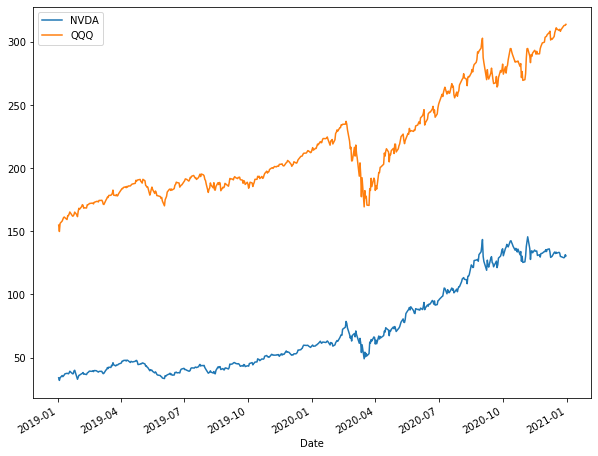

In [ ]:
df_NVDA['Close'].plot(label = 'NVDA', figsize=(10,8))
df_qqq['Close'].plot(label = 'QQQ')
plt.legend()

Statistics
As seen from the plot, it seems like the stock performance is mimicking the market performance. So statistically they can be compared. The cumulative returns are found.

In [ ]:
df_NVDA['Cumu'] = df_NVDA['Close']/df_NVDA['Close'].iloc[0]
df_qqq['Cumu'] = df_qqq['Close']/df_qqq['Close'].iloc[0]

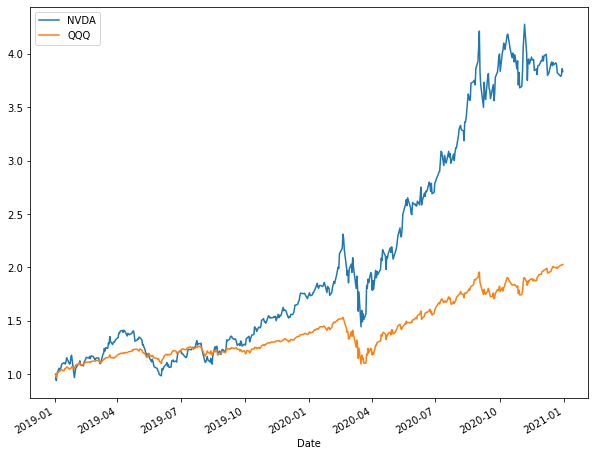

In [ ]:
df_NVDA['Cumu'].plot(label = 'NVDA', figsize=(10,8))
df_qqq['Cumu'].plot(label = 'QQQ')
plt.legend()

#### The daily return is also determined.

In [ ]:
df_NVDA['daily_ret'] = df_NVDA['Close'].pct_change(1)
df_qqq['daily_ret'] = df_qqq['Close'].pct_change(1)

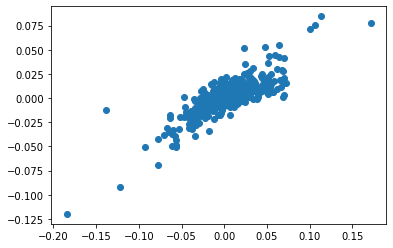

In [ ]:
plt.scatter(df_NVDA['daily_ret'],df_qqq['daily_ret'])

The scatter plot indicates that there is some relation between the daily returns of the stock and market.

In [ ]:
LR = stats.linregress(df_NVDA['daily_ret'].iloc[1:],df_qqq['daily_ret'].iloc[1:])
LR

LinregressResult(slope=0.45982551958878665, intercept=9.817227500924573e-05, rvalue=0.8297273291972005, pvalue=3.224107532513034e-129, stderr=0.01380611473567131)

The linear regression model is built. It has 5 values which can be obtained through tuple unpacking. 
The five values are beta, alpha, rvalue, pvalue and standard error.

In [ ]:
beta,alpha,r_val,p_val,std_err = LR

In [ ]:
beta

0.45982551958878665

In [ ]:
alpha

9.817227500924573e-05

In [ ]:
r_val

0.8297273291972005

In [ ]:
p_val

3.224107532513034e-129

In [ ]:
std_err

0.01380611473567131

Take a note that as the CAPM said that alpha is close to zero, it can be seen here too. 
And the beta value is high if the stock behave just like the market. 
Therefore the beta value is really low here as there is not much relation between them.

## AMD

In [ ]:
df_qqq = web.DataReader('QQQ','yahoo',start,end)
df_qqq.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,155.750000,150.880005,150.990005,154.880005,58576700.0,151.824432
2019-01-03,153.259995,149.490005,152.600006,149.820007,74820200.0,146.864273
2019-01-04,157.000000,151.740005,152.339996,156.229996,74709300.0,153.147781
2019-01-07,158.860001,156.110001,156.619995,158.089996,52059300.0,154.971085
2019-01-08,160.110001,157.199997,159.539993,159.520004,49388700.0,156.372910


In [ ]:
df_AMD = web.DataReader('AMD','yahoo',start,end)
df_AMD.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,19.000000,17.980000,18.010000,18.830000,87148700,18.830000
2019-01-03,18.680000,16.940001,18.420000,17.049999,117277600,17.049999
2019-01-04,19.070000,17.430000,17.549999,19.000000,111878600,19.000000
2019-01-07,20.680000,19.000000,19.440001,20.570000,107157000,20.570000
2019-01-08,21.200001,19.680000,21.190001,20.750000,121271000,20.750000


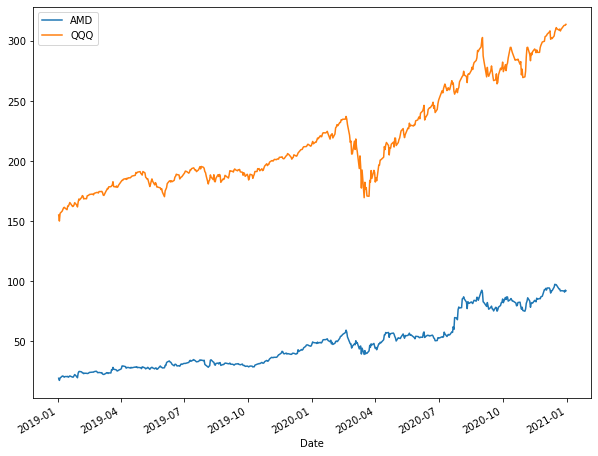

In [ ]:
df_AMD['Close'].plot(label = 'AMD', figsize=(10,8))
df_qqq['Close'].plot(label = 'QQQ')
plt.legend()

In [ ]:
df_AMD['Cumu'] = df_AMD['Close']/df_AMD['Close'].iloc[0]
df_qqq['Cumu'] = df_qqq['Close']/df_qqq['Close'].iloc[0]

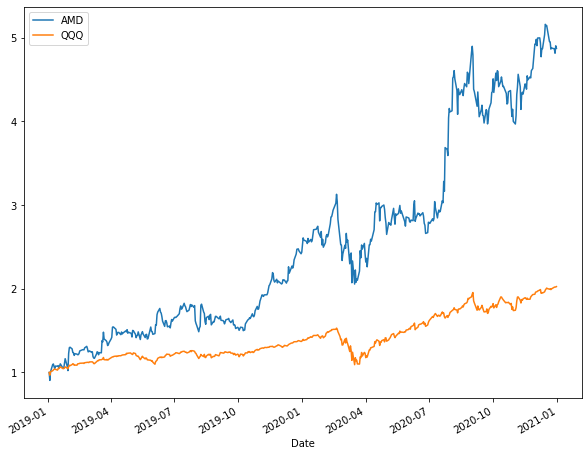

In [ ]:
df_AMD['Cumu'].plot(label = 'AMD', figsize=(10,8))
df_qqq['Cumu'].plot(label = 'QQQ')
plt.legend()

In [ ]:
df_AMD['daily_ret'] = df_AMD['Close'].pct_change(1)
df_qqq['daily_ret'] = df_qqq['Close'].pct_change(1)

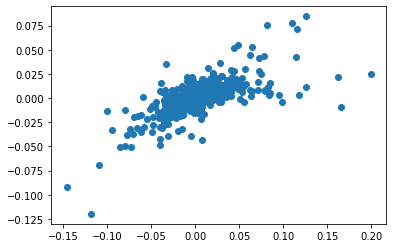

In [ ]:
plt.scatter(df_AMD['daily_ret'],df_qqq['daily_ret'])

In [ ]:
LR1 = stats.linregress(df_AMD['daily_ret'].iloc[1:],df_qqq['daily_ret'].iloc[1:])
LR1

LinregressResult(slope=0.3250618797750387, intercept=0.0003220313937499265, rvalue=0.6758996869498626, pvalue=1.539097630061541e-68, stderr=0.015819606398662332)

## INTC

In [ ]:
df_INTC = web.DataReader('INTC','yahoo',start,end)
df_INTC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,47.470001,45.770000,45.959999,47.080002,18774600.0,43.356529
2019-01-03,46.279999,44.389999,46.150002,44.490002,32267300.0,40.971371
2019-01-04,47.570000,45.540001,45.840000,47.220001,35447300.0,43.485462
2019-01-07,48.000000,46.750000,47.099998,47.439999,22736800.0,43.688068
2019-01-08,48.029999,46.779999,47.799999,47.740002,22749200.0,43.964333


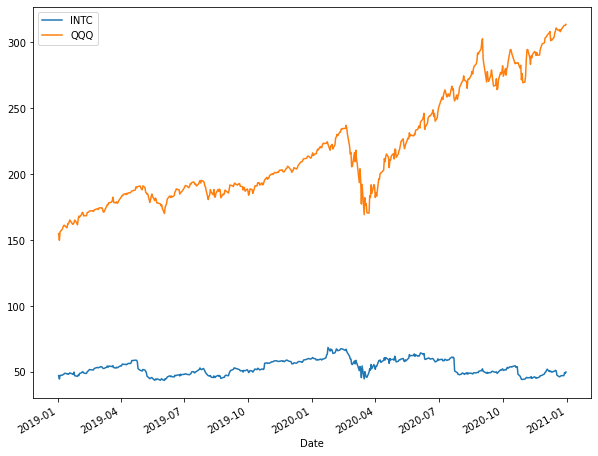

In [ ]:
df_INTC['Close'].plot(label = 'INTC', figsize=(10,8))
df_qqq['Close'].plot(label = 'QQQ')
plt.legend()

In [ ]:
df_INTC['Cumu'] = df_INTC['Close']/df_INTC['Close'].iloc[0]
df_qqq['Cumu'] = df_qqq['Close']/df_qqq['Close'].iloc[0]

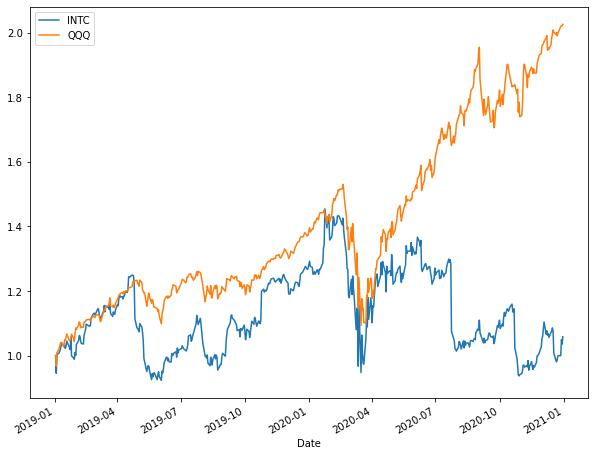

In [ ]:
df_INTC['Cumu'].plot(label = 'INTC', figsize=(10,8))
df_qqq['Cumu'].plot(label = 'QQQ')
plt.legend()

In [ ]:
df_INTC['daily_ret'] = df_INTC['Close'].pct_change(1)
df_qqq['daily_ret'] = df_qqq['Close'].pct_change(1)

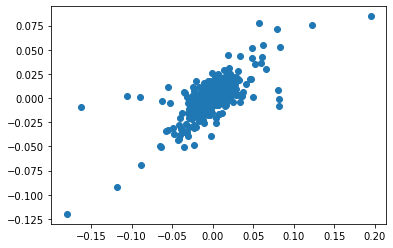

In [ ]:
plt.scatter(df_INTC['daily_ret'],df_qqq['daily_ret'])

In [ ]:
LR2 = stats.linregress(df_INTC['daily_ret'].iloc[1:],df_qqq['daily_ret'].iloc[1:])
LR2

LinregressResult(slope=0.48000693458038785, intercept=0.0013284572080748025, rvalue=0.7338605396153834, pvalue=2.3988620238198384e-86, stderr=0.01983096438138915)